In [1]:
pwd

'C:\\Users\\Admin\\Desktop\\ImageProcess'

In [6]:
import tensorflow as tf


In [7]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [8]:
pip list

Package                            Version            
---------------------------------- -------------------
absl-py                            0.9.0              
alabaster                          0.7.12             
anaconda-client                    1.7.2              
anaconda-navigator                 1.9.7              
anaconda-project                   0.8.3              
asn1crypto                         1.2.0              
astor                              0.8.1              
astroid                            2.3.3              
astropy                            4.0                
atomicwrites                       1.3.0              
attrs                              19.3.0             
Babel                              2.8.0              
backcall                           0.1.0              
backports.functools-lru-cache      1.6.1              
backports.os                       0.1.1              
backports.shutil-get-terminal-size 1.0.0              
backports.

In [26]:
%matplotlib inline
from IPython.display import display,Math,Latex

import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

img=Image.open('dataset/low3.jpg')

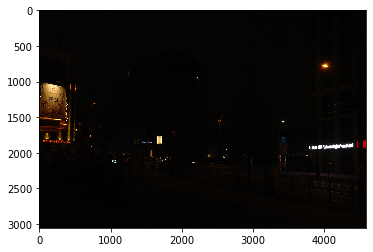

In [27]:
plt.imshow(img,cmap='gray')

In [28]:
#converting my image into numpy array

img=np.asarray(img)

(array([3.4184738e+07, 5.6328800e+06, 9.4658600e+05, 3.2012500e+05,
        1.5445400e+05, 9.5379000e+04, 6.7862000e+04, 5.3822000e+04,
        4.4310000e+04, 3.8204000e+04, 3.8629000e+04, 2.8150000e+04,
        2.5027000e+04, 2.4550000e+04, 2.2707000e+04, 2.1388000e+04,
        2.0397000e+04, 1.9140000e+04, 1.7210000e+04, 1.6307000e+04,
        1.8078000e+04, 1.3991000e+04, 1.4065000e+04, 1.4373000e+04,
        1.2886000e+04, 1.1973000e+04, 1.1809000e+04, 1.0915000e+04,
        1.0215000e+04, 9.7420000e+03, 1.0356000e+04, 8.3230000e+03,
        7.3510000e+03, 5.8830000e+03, 5.8650000e+03, 5.8910000e+03,
        6.3150000e+03, 6.2610000e+03, 6.4280000e+03, 6.2360000e+03,
        6.3020000e+03, 4.5000000e+03, 4.6270000e+03, 4.7500000e+03,
        5.3700000e+03, 6.0340000e+03, 5.2570000e+03, 4.2640000e+03,
        5.2420000e+03, 8.4289000e+04]),
 array([  0. ,   5.1,  10.2,  15.3,  20.4,  25.5,  30.6,  35.7,  40.8,
         45.9,  51. ,  56.1,  61.2,  66.3,  71.4,  76.5,  81.6,  86.7,
  

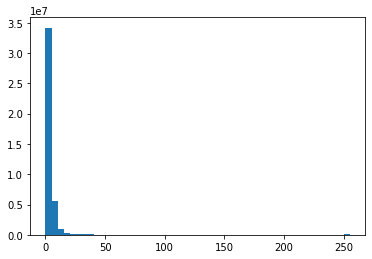

In [29]:
#flattening image pixels
flat=img.flatten()

#showing histogram
plt.hist(flat,bins =50)

In [30]:
#histogram equalisation function

display(Math(r'P_x(j) = \sum_{i=0}^{j} P_x(i)'))

<IPython.core.display.Math object>

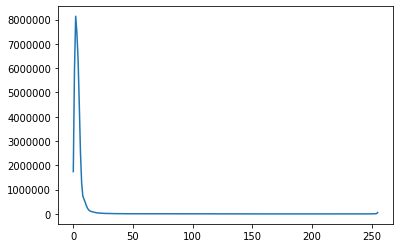

In [31]:
def get_histogram(image,bins):
    histogram = np.zeros(bins)
    for pixel in image:
        histogram[pixel]+=1
    return histogram
hist = get_histogram(flat,256)
plt.plot(hist)

<IPython.core.display.Math object>

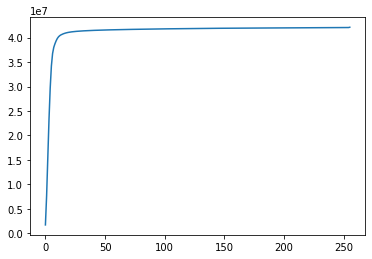

In [32]:
def cumsum(a):
    a=iter(a)
    b=[next(a)]
    for i in a:
        b.append(b[-1]+i)
    return np.array(b)

cs = cumsum(hist)
plt.plot(cs)

display(Math(r's_k = \sum_{j=0}^{k} {\frac{n_j}{N}}'))

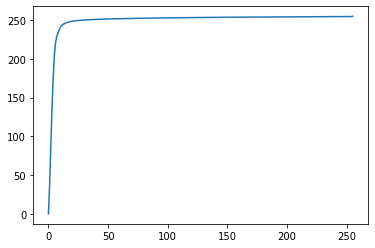

In [33]:
#normalizing between 0-255

nj=(cs-cs.min())*255
N=cs.max()-cs.min()

cs = nj/N
plt.plot(cs)

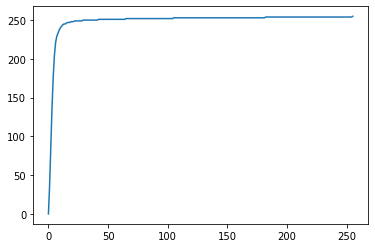

In [34]:
cs=cs.astype('uint8')
plt.plot(cs)

(array([1740145.,       0.,       0.,       0.,       0.,       0.,
              0., 5942234.,       0.,       0.,       0.,       0.,
              0.,       0.,       0.,       0.,       0., 8133985.,
              0.,       0.,       0.,       0.,       0.,       0.,
              0.,       0., 7459109.,       0.,       0.,       0.,
              0.,       0.,       0.,       0., 6366852.,       0.,
              0.,       0.,       0.,       0., 4542413.,       0.,
              0., 2544488., 1270366.,  738634.,  600137., 1041637.,
         920062.,  799394.]),
 array([  0. ,   5.1,  10.2,  15.3,  20.4,  25.5,  30.6,  35.7,  40.8,
         45.9,  51. ,  56.1,  61.2,  66.3,  71.4,  76.5,  81.6,  86.7,
         91.8,  96.9, 102. , 107.1, 112.2, 117.3, 122.4, 127.5, 132.6,
        137.7, 142.8, 147.9, 153. , 158.1, 163.2, 168.3, 173.4, 178.5,
        183.6, 188.7, 193.8, 198.9, 204. , 209.1, 214.2, 219.3, 224.4,
        229.5, 234.6, 239.7, 244.8, 249.9, 255. ]),
 <a list of 50 Patc

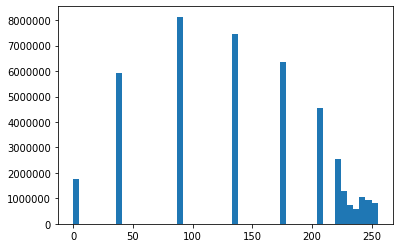

In [35]:
img_new = cs[flat]
plt.hist(img_new,bins=50)

In [36]:
img_new = np.reshape(img_new,img.shape)
img_new

array([[[204, 204, 204],
        [204, 204, 204],
        [136, 136, 136],
        ...,
        [ 37,  37,  37],
        [ 37,  37,  37],
        [ 37,  37,  37]],

       [[176, 176, 176],
        [237, 237, 237],
        [204, 204, 204],
        ...,
        [ 88,  88,  88],
        [ 37,  37,  37],
        [ 37,  37,  37]],

       [[176, 176, 176],
        [221, 221, 221],
        [204, 204, 136],
        ...,
        [136, 136, 136],
        [136, 136, 136],
        [ 37,  37,  37]],

       ...,

       [[ 88,  88,  88],
        [ 37,  37,  37],
        [ 37,  37,  37],
        ...,
        [221,  88,  37],
        [221,  88,  37],
        [221,  88,  37]],

       [[ 37,  37,  37],
        [ 37,  37,  37],
        [ 37,  37,  37],
        ...,
        [229, 136,  88],
        [229, 136,  88],
        [221,  88,  37]],

       [[ 37,  37,  37],
        [ 37,  37,  37],
        [ 88,  88,  88],
        ...,
        [233, 176, 136],
        [233, 176, 136],
        [229, 136,  88]]

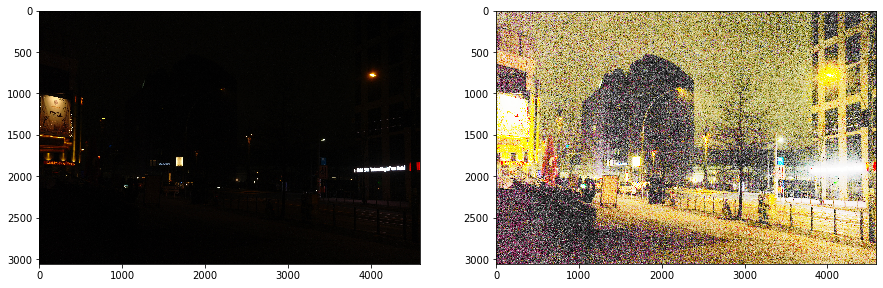

In [37]:
fig=plt.figure()
fig.set_figheight(15)
fig.set_figwidth(15)

fig.add_subplot(1,2,1)
plt.imshow(img,cmap='gray')

#new image display

fig.add_subplot(1,2,2)
plt.imshow(img_new,cmap='gray')

plt.show(block=True)

In [25]:
newimg= Image.fromarray(img_new,'RGB')
newimg.save('dataset/low7enhanced.jpg')
newimg.show()